# Goal

Identify overwatch heroes in team composition screen. Since the input is an image it could read from videos from youtube or twitch.


# Methodology 

Since I don't really know much of opencv I'll be exploring different functions until I hit something that might work. 

In [1]:
%matplotlib inline

In [2]:
path = 'screenshots/Screenshot from Jayne Reviews - Bronze Ana-jOZ_VdD1-9I.mkv.png'

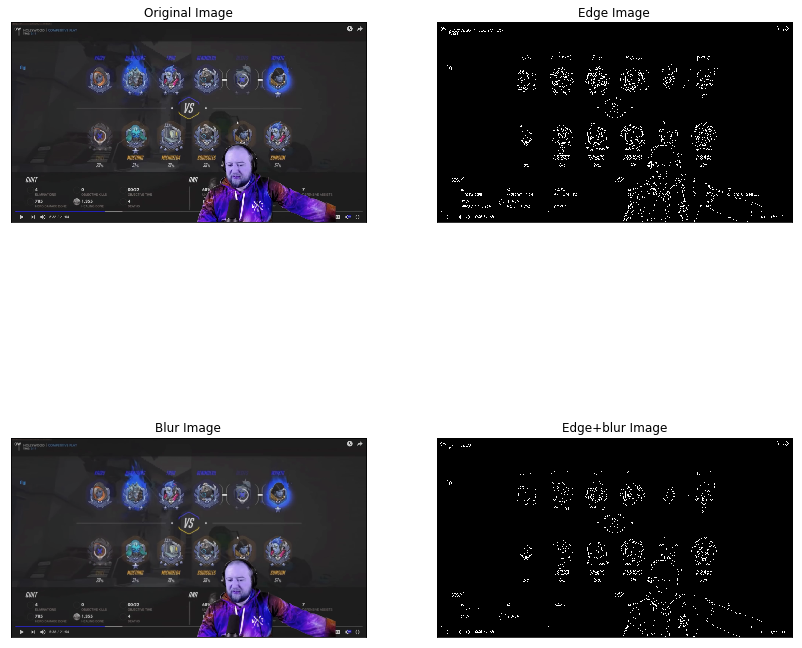

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path)
edges = cv2.Canny(img,100,200)
blur = cv2.GaussianBlur(img,(5,5),0)
edges2 = cv2.Canny(blur,100,200)

f = plt.figure(figsize=(14,14))
plt.subplot(221),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(blur,cmap = 'gray')
plt.title('Blur Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(edges2,cmap = 'gray')
plt.title('Edge+blur Image'), plt.xticks([]), plt.yticks([])

plt.show()

Blur doesn't seem to help much. Edges seems to be ok but may need some processing.

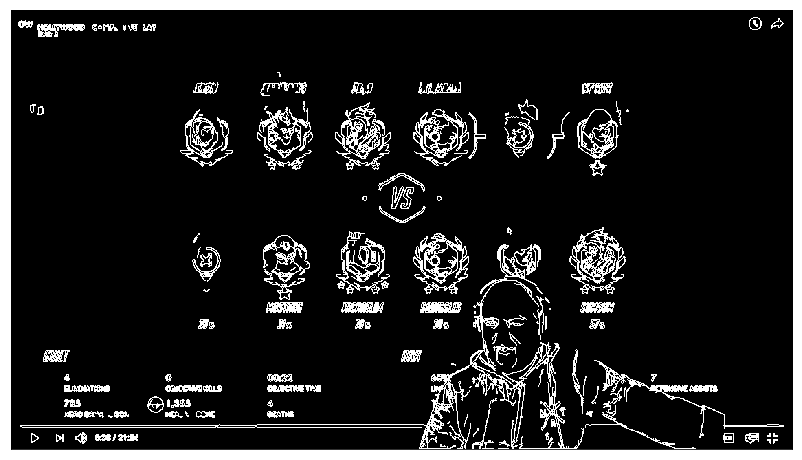

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

edgesDilated = cv2.dilate(edges,kernel,iterations = 1)

f = plt.figure(figsize=(14,14))
plt.subplot(111),plt.imshow(edgesDilated,cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.show()

Edges look ok I think.

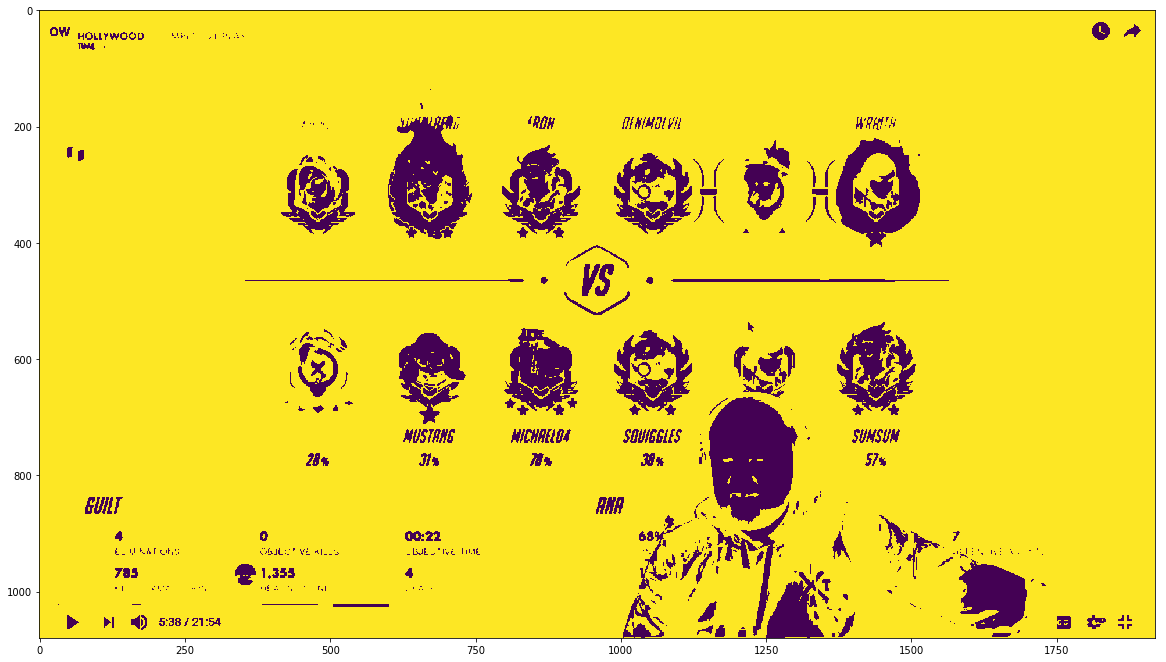

In [5]:
import numpy as np
import cv2

img = cv2.imread(path)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh, ret = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

f = plt.figure(figsize=(20,20))
plt.subplot(111)
plt.imshow(ret);

Areas seems to be detected well, but with many false positives as expected. Not sure what to do with this.

525


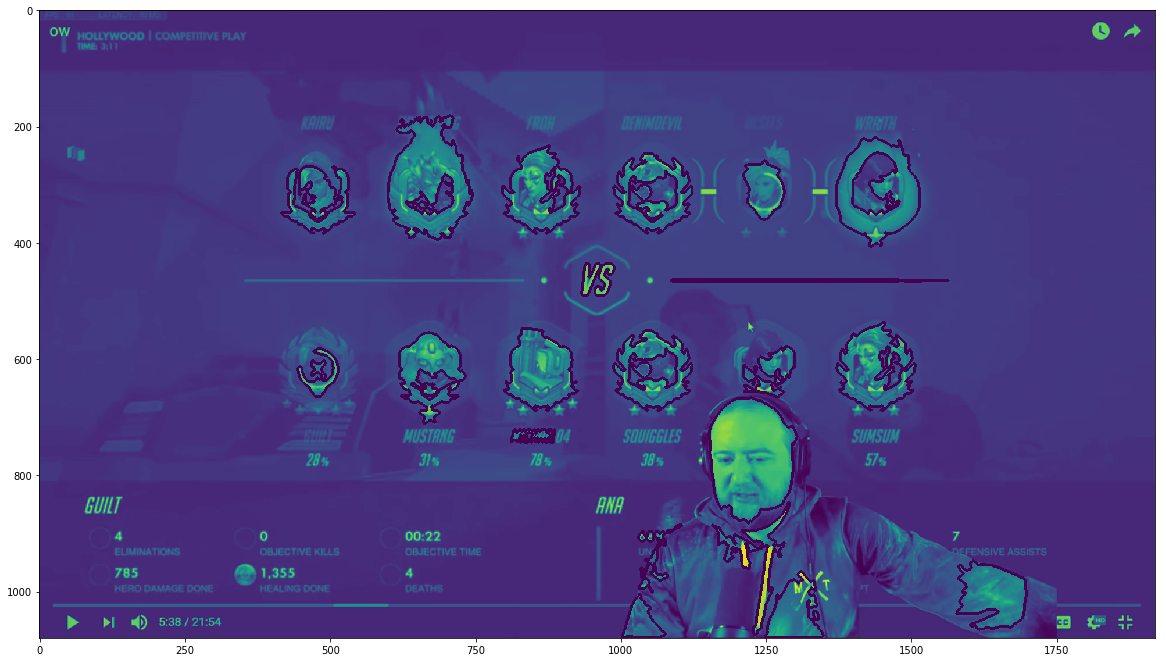

In [6]:
import cv2
import numpy as np

img = cv2.imread(path, 0)
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img,(5,5),0)
ret, thresh= cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
im2, contours,hierarchy = cv2.findContours(thresh, 1, 2)

print(len(contours))
for cnt in contours:
    M = cv2.moments(cnt)
    # print(M['m00'])
    if M['m00'] < 1000: continue
    x,y,w,h = cv2.boundingRect(cnt)
    # img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    img = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)

f = plt.figure(figsize=(20,20))
plt.subplot(111)
plt.imshow(img);

Contours seem to be fine. Might be useful.

Let's go back to edges try to match a template.

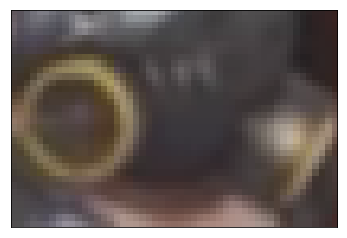

In [8]:
roadhog = cv2.imread('screenshots/roadhog.png')
plt.subplot(111),plt.imshow(cv2.cvtColor(roadhog, cv2.COLOR_BGR2RGB))
plt.title(''), plt.xticks([]), plt.yticks([])
plt.show();

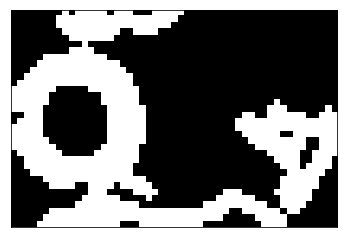

In [7]:
roadhog = cv2.imread('screenshots/roadhog.png')
edges = cv2.Canny(roadhog,100,200)
roadhogEdgesDilated = cv2.dilate(edges,kernel,iterations = 1)


plt.subplot(111),plt.imshow(roadhogEdgesDilated ,cmap = 'gray')
plt.title(''), plt.xticks([]), plt.yticks([])

plt.show()

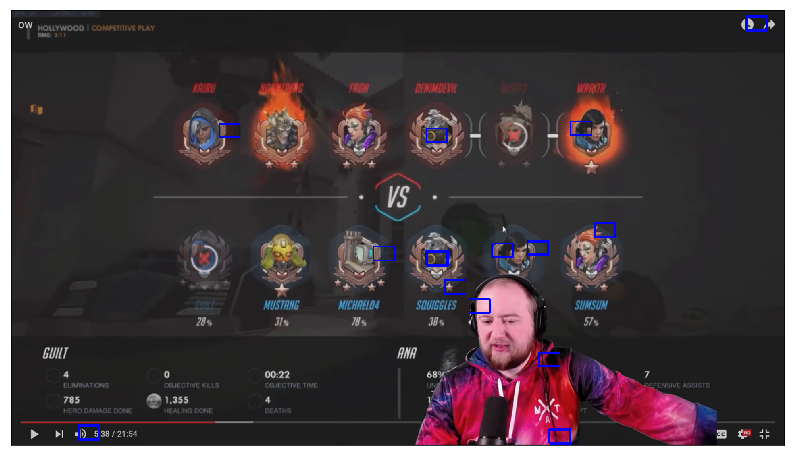

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = edgesDilated
img2 = img.copy()
template = roadhogEdgesDilated
w, h = template.shape[::-1]

img = img2.copy()
method = cv2.TM_SQDIFF# TM_CCOEFF_NORMED

res = cv2.matchTemplate(img,template,method)

img = cv2.imread(path)
result2 = np.reshape(res, res.shape[0]*res.shape[1])
sort = np.argsort(result2)
for i in range(0, 100):
    (y, x) = np.unravel_index(sort[i], res.shape)
    cv2.rectangle(img,(x,y), (x+w,y+h), 255, 2)

f = plt.figure(figsize=(20,8))
plt.subplot(111),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])

plt.show()

I had to run the top 100 results to find both appearances of roadhog, so there are a lot of false positives. Let's try Moira.

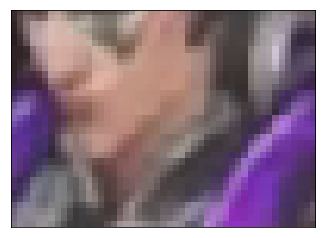

In [7]:
moira = cv2.imread('screenshots/moira.png')
plt.subplot(111),plt.imshow(cv2.cvtColor(moira, cv2.COLOR_BGR2RGB))
plt.title(''), plt.xticks([]), plt.yticks([])
plt.show();

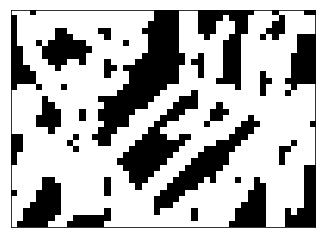

In [10]:
moira = cv2.imread('screenshots/moira.png')
edges = cv2.Canny(moira,100,200)
moiraEdgesDilated = cv2.dilate(edges,kernel,iterations = 1)


plt.subplot(111),plt.imshow(moiraEdgesDilated ,cmap = 'gray')
plt.title(''), plt.xticks([]), plt.yticks([])

plt.show()

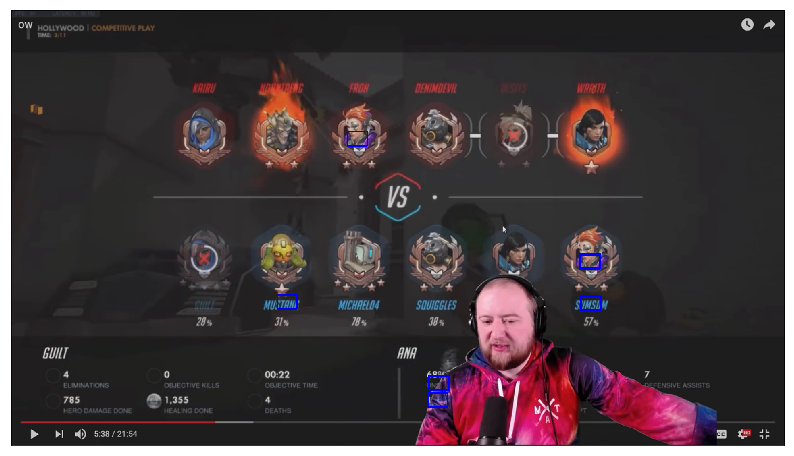

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = edgesDilated
img2 = img.copy()
template = moiraEdgesDilated
w, h = template.shape[::-1]

img = img2.copy()
method = cv2.TM_SQDIFF# TM_CCOEFF_NORMED

res = cv2.matchTemplate(img,template,method)

img = cv2.imread(path)
result2 = np.reshape(res, res.shape[0]*res.shape[1])
sort = np.argsort(result2)
for i in range(0, 20):
    (y, x) = np.unravel_index(sort[i], res.shape)
    cv2.rectangle(img,(x,y), (x+w,y+h), 255, 2)

f = plt.figure(figsize=(20,8))

plt.subplot(111),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()

With only 20 results both were detected.

# TODO

We had found some areas of interest. Find the contour in those areas, and see what their moments and histogram look like to remove the false positives.